In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

Imports:

In [4]:
#all  imports
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from math import isnan
from networkx.algorithms.community.centrality import girvan_newman

In [5]:
#read all data from CSV file, and show info about duplicates in it
def readFromCsvCheckDuplicates(filePath):
    temp = pd.read_csv(filePath)
    print("Dimensions of data: " + str(temp.shape))
    tempDuplicates = temp[temp.duplicated()]
    if tempDuplicates.shape[0] == 0:
        print("No duplicates in data")
    else:
        print("Duplicates are:")
        print(tempDuplicates)
    return temp
#check if column contains nulls, and if it is unique
def checkColumnNullsAndUnique(dataTmp):
    for column in dataTmp.columns:
        print(column+"\\\t"+ str(dataTmp[column].isnull().values.any())
              + "\\\t"+str(dataTmp[column].is_unique))
#set default values for rank and points if they are nulls
def checkNullsRankAndPoints(rankColumn, rankPointsColumn):
    maska = (atp_matches_data_ALL[rankColumn].isnull())
    for index, row in atp_matches_data_ALL[maska].iterrows():
        atp_matches_data_ALL.at[index,rankColumn] = 2272
        atp_matches_data_ALL.at[index,rankPointsColumn] = 0

Reading of files:

In [6]:
G2018 = nx.read_gml("Basic2018.gml")
G2019 = nx.read_gml("Basic2019.gml")
G2020 = nx.read_gml("Basic2020.gml")
print(nx.info(G2018))
print(nx.info(G2019))
print(nx.info(G2020))
atp_matches_data_ALL = readFromCsvCheckDuplicates("atp_matches_ALL.csv")

Name: 
Type: Graph
Number of nodes: 419
Number of edges: 2489
Average degree:  11.8807
Name: 
Type: Graph
Number of nodes: 364
Number of edges: 2378
Average degree:  13.0659
Name: 
Type: Graph
Number of nodes: 345
Number of edges: 1325
Average degree:   7.6812
Dimensions of data: (6925, 49)
No duplicates in data


In [7]:
#add id column to matches data
atp_matches_data_ALL['id'] = atp_matches_data_ALL.index
print(atp_matches_data_ALL.shape)

(6925, 50)


In [8]:
#delete unnecessary columns from matches data
list_to_delete_columns = ['draw_size', 'match_num', 'winner_seed',
                          'winner_entry', 'winner_ht', 'loser_ht',
                          'loser_seed', 'loser_entry', 'score',
                          'best_of', 'minutes', 'w_ace', 'w_df',
                          'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
                          'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace',
                          'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
                          'l_2ndWon', 'l_SvGms', 'l_bpSaved',
                          'l_bpFaced', 'winner_name', 'winner_hand',
                          'winner_age', 'winner_ioc', 'loser_name',
                          'loser_hand', 'loser_age', 'loser_ioc']
for column in list_to_delete_columns:
    del atp_matches_data_ALL[column]
print(atp_matches_data_ALL.shape)

(6925, 13)


In [9]:
#plot all data from column in dataframe
def plot_column(nameOfColumn):
    atp_matches_data_ALL.groupby(nameOfColumn)['id']\
        .nunique().plot(kind='bar')
    plt.show()
#plotting all columns
#for column in atp_matches_data_ALL.columns:
   # plot_column(column)

In [10]:
#set default values if null in winner and loser rank and points data
checkNullsRankAndPoints('winner_rank','winner_rank_points')
checkNullsRankAndPoints('loser_rank','loser_rank_points')

In [11]:
#check if columns are nulls or unique
checkColumnNullsAndUnique(atp_matches_data_ALL)
print('---------------------------------------')

tourney_id\	False\	False
tourney_name\	False\	False
surface\	False\	False
tourney_level\	False\	False
tourney_date\	False\	False
winner_id\	False\	False
loser_id\	False\	False
round\	False\	False
winner_rank\	False\	False
winner_rank_points\	False\	False
loser_rank\	False\	False
loser_rank_points\	False\	False
id\	False\	True
---------------------------------------


In [12]:
#read all player info
atp_players_data_info = readFromCsvCheckDuplicates("atp_players.csv")

Dimensions of data: (54975, 6)
No duplicates in data


In [13]:
G = nx.Graph()
for node in G2018.nodes:
    G.add_node(node, name=G2018.nodes[node]['name'],
               surname=G2018.nodes[node]['surname'],
               country=G2018.nodes[node]['country'],
               hand=G2018.nodes[node]['hand'],
               dateOfBirth=G2018.nodes[node]['dateOfBirth'],
               tourneyNum = G2018.nodes[node]['tourneyNum'],
               avgRank=G2018.nodes[node]['avgRank'],
               avgPoints=G2018.nodes[node]['avgPoints'],
               tourneyNum2018=G2018.nodes[node]['tourneyNum'],
               avgRank2018=G2018.nodes[node]['avgRank'],
               avgPoints2018=G2018.nodes[node]['avgPoints'])
for node in G2019.nodes:
    if node in G.nodes:
        G.nodes[node]['tourneyNum']+=G2019.nodes[node]['tourneyNum']
        G.nodes[node]['avgRank']+=G2019.nodes[node]['avgRank']
        G.nodes[node]['avgPoints']+=G2019.nodes[node]['avgPoints']
        G.nodes[node]['tourneyNum2019']=G2019.nodes[node]['tourneyNum']
        G.nodes[node]['avgRank2019']=G2019.nodes[node]['avgRank']
        G.nodes[node]['avgPoints2019']=G2019.nodes[node]['avgPoints']
    else:
        G.add_node(node, name=G2019.nodes[node]['name'],
               surname=G2019.nodes[node]['surname'],
               country=G2019.nodes[node]['country'],
               hand=G2019.nodes[node]['hand'],
               dateOfBirth=G2019.nodes[node]['dateOfBirth'],
               tourneyNum = G2019.nodes[node]['tourneyNum'],
               avgRank=G2019.nodes[node]['avgRank'],
               avgPoints=G2019.nodes[node]['avgPoints'],
               tourneyNum2019=G2019.nodes[node]['tourneyNum'],
               avgRank2019=G2019.nodes[node]['avgRank'],
               avgPoints2019=G2019.nodes[node]['avgPoints'])
for node in G2020.nodes:
    if node in G.nodes:
        G.nodes[node]['tourneyNum']+=G2020.nodes[node]['tourneyNum']
        G.nodes[node]['avgRank']+=G2020.nodes[node]['avgRank']
        G.nodes[node]['avgPoints']+=G2020.nodes[node]['avgPoints']
        G.nodes[node]['tourneyNum2020']=G2020.nodes[node]['tourneyNum']
        G.nodes[node]['avgRank2020']=G2020.nodes[node]['avgRank']
        G.nodes[node]['avgPoints2020']=G2020.nodes[node]['avgPoints']
    else:
        G.add_node(node, name=G2020.nodes[node]['name'],
               surname=G2020.nodes[node]['surname'],
               country=G2020.nodes[node]['country'],
               hand=G2020.nodes[node]['hand'],
               dateOfBirth=G2020.nodes[node]['dateOfBirth'],
               tourneyNum = G2020.nodes[node]['tourneyNum'],
               avgRank=G2020.nodes[node]['avgRank'],
               avgPoints=G2020.nodes[node]['avgPoints'],
               tourneyNum2020=G2020.nodes[node]['tourneyNum'],
               avgRank2020=G2020.nodes[node]['avgRank'],
               avgPoints2020=G2020.nodes[node]['avgPoints'])

for node in G.nodes:
    counter = 0.0
    if not(G.nodes[node].get('avgRank2018') is None):counter+=1.0
    if not(G.nodes[node].get('avgRank2019') is None):counter+=1.0
    if not(G.nodes[node].get('avgRank2020') is None):counter+=1.0
    G.nodes[node]['avgRank']/=counter
    G.nodes[node]['avgPoints']/=counter
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 581
Number of edges: 0
Average degree:   0.0000


In [14]:
for edge in G2018.edges:
    G.add_edge(edge[0],edge[1],
               weight=G2018[edge[0]][edge[1]]['weight'],
               lowerId=G2018[edge[0]][edge[1]]['lowerId'],
               higherId=G2018[edge[0]][edge[1]]['higherId'],
               weight2018=G2018[edge[0]][edge[1]]['weight'],
               lowerId2018=G2018[edge[0]][edge[1]]['lowerId'],
               higherId2018=G2018[edge[0]][edge[1]]['higherId'])
for edge in G2019.edges:
    if G.has_edge(edge[0],edge[1]):
        G[edge[0]][edge[1]]['weight']+=G2019[edge[0]][edge[1]]['weight']
        G[edge[0]][edge[1]]['lowerId']+=G2019[edge[0]][edge[1]]['lowerId']
        G[edge[0]][edge[1]]['higherId']+=G2019[edge[0]][edge[1]]['higherId']
        G[edge[0]][edge[1]]['weight2019']=G2019[edge[0]][edge[1]]['weight']
        G[edge[0]][edge[1]]['lowerId2019']=G2019[edge[0]][edge[1]]['lowerId']
        G[edge[0]][edge[1]]['higherId2019']=G2019[edge[0]][edge[1]]['higherId']
    else:
        G.add_edge(edge[0],edge[1],
               weight=G2019[edge[0]][edge[1]]['weight'],
               lowerId=G2019[edge[0]][edge[1]]['lowerId'],
               higherId=G2019[edge[0]][edge[1]]['higherId'],
               weight2019=G2019[edge[0]][edge[1]]['weight'],
               lowerId2019=G2019[edge[0]][edge[1]]['lowerId'],
               higherId2019=G2019[edge[0]][edge[1]]['higherId'])
for edge in G2020.edges:
    if G.has_edge(edge[0],edge[1]):
        G[edge[0]][edge[1]]['weight']+=G2020[edge[0]][edge[1]]['weight']
        G[edge[0]][edge[1]]['lowerId']+=G2020[edge[0]][edge[1]]['lowerId']
        G[edge[0]][edge[1]]['higherId']+=G2020[edge[0]][edge[1]]['higherId']
        G[edge[0]][edge[1]]['weight2020']=G2020[edge[0]][edge[1]]['weight']
        G[edge[0]][edge[1]]['lowerId2020']=G2020[edge[0]][edge[1]]['lowerId']
        G[edge[0]][edge[1]]['higherId2020']=G2020[edge[0]][edge[1]]['higherId']
    else:
        G.add_edge(edge[0],edge[1],
               weight=G2020[edge[0]][edge[1]]['weight'],
               lowerId=G2020[edge[0]][edge[1]]['lowerId'],
               higherId=G2020[edge[0]][edge[1]]['higherId'],
               weight2020=G2020[edge[0]][edge[1]]['weight'],
               lowerId2020=G2020[edge[0]][edge[1]]['lowerId'],
               higherId2020=G2020[edge[0]][edge[1]]['higherId'])

In [15]:
#write to a file
output_path = "BasicALL.gml"
nx.write_gml(G, output_path)

In [16]:
#pitanje 6
numOfPlayersByCountryCounter = {}
for player in G.degree:
    player2 = atp_players_data_info[atp_players_data_info['id']==(int(player[0]))]
    if player2['country'].values[0] in numOfPlayersByCountryCounter.keys():
        numOfPlayersByCountryCounter[player2['country'].values[0]] +=1
    else:
        numOfPlayersByCountryCounter[player2['country'].values[0]]=1
print(dict(sorted(numOfPlayersByCountryCounter.items(), key=lambda item: item[1], reverse=True)))
plt.bar(*zip(*numOfPlayersByCountryCounter.items()))
plt.show()

{'USA': 44, 'FRA': 33, 'ITA': 27, 'ESP': 27, 'GER': 26, 'ARG': 19, 'AUS': 17, 'RUS': 15, 'SRB': 10, 'CAN': 10, 'GBR': 10, 'CZE': 9, 'BRA': 9, 'AUT': 8, 'JPN': 8, 'BEL': 8, 'TPE': 8, 'HKG': 8, 'ROU': 7, 'SUI': 7, 'INA': 7, 'CRO': 7, 'POL': 7, 'HUN': 7, 'IND': 7, 'ISR': 6, 'CHN': 6, 'SVK': 6, 'KOR': 6, 'VEN': 6, 'DEN': 6, 'COL': 5, 'URU': 5, 'UKR': 5, 'RSA': 5, 'SLO': 5, 'NED': 5, 'TUR': 5, 'EST': 5, 'POR': 5, 'PER': 5, 'BLR': 5, 'BIH': 5, 'CHI': 5, 'BUL': 5, 'NOR': 5, 'GEO': 5, 'THA': 4, 'GUA': 4, 'BAR': 4, 'UZB': 4, 'NZL': 4, 'ZIM': 4, 'SRI': 4, 'SWE': 4, 'KAZ': 4, 'MAR': 4, 'ECU': 4, 'FIN': 4, 'PAK': 4, 'LTU': 4, 'EGY': 4, 'MEX': 4, 'PHI': 4, 'PAR': 4, 'ESA': 3, 'LUX': 3, 'TUN': 3, 'BOL': 3, 'DOM': 3, 'IRI': 3, 'PUR': 3, 'KEN': 3, 'VIE': 3, 'CYP': 2, 'MDA': 2, 'LIB': 2, 'IRL': 2, 'GRE': 2, 'QAT': 2, 'CRC': 2, 'ALG': 1, 'LAT': 1, 'MON': 1, 'LVA': 1, 'JAM': 1, 'SYR': 1, 'UNK': 1}


In [17]:
sum = 0.0
for edge in G.edges:
    sum += G.get_edge_data(*edge)['weight']
sum /= G.number_of_edges()
print(sum)

1.3352720450281426


In [18]:
#pitanje 11
player_rank_to_edge_weight=pd.DataFrame(columns=['avgWeight', 'rank'])
for node in G.nodes:
    sum = 0.0
    counter = 0
    for neighbor in nx.neighbors(G, node):
        sum+=G[node][neighbor]['weight']
        counter+=1
    sum /= counter
    player_rank_to_edge_weight = player_rank_to_edge_weight.append(
        pd.DataFrame([[sum, G.nodes[node]['avgRank']]], columns=['avgWeight', 'rank']))
print(player_rank_to_edge_weight)

    avgWeight         rank
0    1.000000  1278.647059
0    1.142857   129.641187
0    1.000000   193.425532
0    1.142857   586.971822
0    1.483516    48.657736
..        ...          ...
0    1.000000   342.629630
0    1.000000   934.259259
0    1.000000   186.259259
0    1.000000   140.814815
0    1.000000   508.592593

[581 rows x 2 columns]


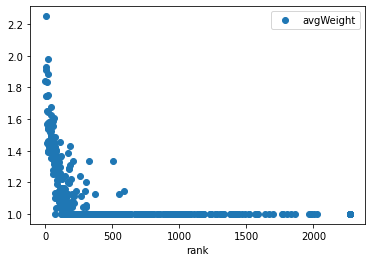

In [19]:
#pitanje 11
player_rank_to_edge_weight.plot(x='rank', y='avgWeight', style='o')
plt.show()

In [20]:
#pitanje 17
player_rank_to_degree=pd.DataFrame(columns=['degree', 'rank'])
for node in G.nodes:
    player_rank_to_degree = player_rank_to_degree.append(
        pd.DataFrame([[G.degree[node], G.nodes[node]['avgRank']]],
                     columns=['degree', 'rank']))
print(player_rank_to_degree)

   degree         rank
0       1  1278.647059
0      35   129.641187
0       7   193.425532
0       7   586.971822
0      91    48.657736
..    ...          ...
0       1   342.629630
0       1   934.259259
0       1   186.259259
0       5   140.814815
0       1   508.592593

[581 rows x 2 columns]


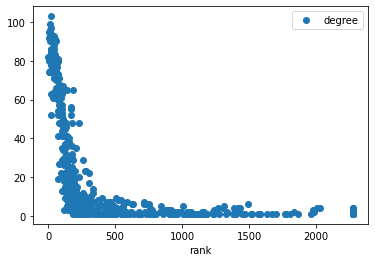

In [21]:
#pitanje 17
player_rank_to_degree.plot(x='rank', y='degree', style='o')
plt.show()

In [22]:
#klasterisanje pitanje 10
id_player, clustering_coef = zip(*nx.clustering(G, weight = "weight").items())

nonZero = [(id_ig, cc)  for id_ig, cc in zip(id_player, clustering_coef) if cc > 0]

df = pd.DataFrame(nonZero, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)
print(f"Max lokalni cc: {max(clustering_coef)}")
print(f"Prosečan cc: {nx.average_clustering(G)}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)

Max lokalni cc: 0.16508715292071477
Prosečan cc: 0.18669394967031527
Lokalni stepeni klasterisanja koji nisu nula:
         id        cc
247  122669  0.003472
182  105933  0.007500
216  202358  0.008333
267  106412  0.008333
62   105147  0.008333
..      ...       ...
9    104563  0.157490
281  109699  0.157490
296  105723  0.157490
69   105217  0.160305
306  133018  0.165087

[308 rows x 2 columns]


In [23]:
#asortativnost pitanje 10
# asortativnost na osnovu netežinskog stepena čvora
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: "
      f"{nx.degree_assortativity_coefficient(G)}")

# asortativnost na osnovu težinskog stepena čvora
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: "
      f"{nx.degree_assortativity_coefficient(G, weight='weight')}")

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: 0.16919387110544537
Koeficijent asortativnosti na osnovu težinskog stepena čvora: 0.14652712553286887


In [24]:
#pitanje 9
gn = girvan_newman(G)
print(gn)

<generator object girvan_newman at 0x1DB1D798>


In [25]:
#pitanje 9
tuple(sorted(c) for c in next(gn))

(['100644',
  '103333',
  '103499',
  '103529',
  '103565',
  '103607',
  '103781',
  '103819',
  '103852',
  '103893',
  '103898',
  '103917',
  '103970',
  '103990',
  '104022',
  '104122',
  '104180',
  '104198',
  '104229',
  '104233',
  '104252',
  '104259',
  '104269',
  '104291',
  '104297',
  '104308',
  '104312',
  '104327',
  '104386',
  '104424',
  '104460',
  '104467',
  '104468',
  '104494',
  '104527',
  '104534',
  '104542',
  '104545',
  '104547',
  '104563',
  '104571',
  '104586',
  '104593',
  '104597',
  '104607',
  '104620',
  '104629',
  '104655',
  '104656',
  '104660',
  '104665',
  '104672',
  '104678',
  '104719',
  '104731',
  '104735',
  '104745',
  '104755',
  '104792',
  '104797',
  '104804',
  '104810',
  '104868',
  '104871',
  '104882',
  '104890',
  '104897',
  '104898',
  '104901',
  '104907',
  '104918',
  '104919',
  '104925',
  '104926',
  '104932',
  '104947',
  '104970',
  '104978',
  '104999',
  '105011',
  '105015',
  '105023',
  '105030',
  '1

In [26]:
#pitanje 12
T = nx.k_core(G)
print(nx.info(T))
output_path = "coreALL.gml"
nx.write_gml(T, output_path)
print(T.nodes)

Name: 
Type: Graph
Number of nodes: 85
Number of edges: 2079
Average degree:  48.9176
['105227', '105332', '104527', '105657', '111797', '144719', '106378', '106432', '104655', '105932', '105449', '106426', '126094', '105379', '105554', '105138', '105526', '104259', '104898', '200005', '105583', '106043', '133430', '105023', '105777', '106421', '105916', '106415', '104925', '111815', '126774', '128034', '106000', '126203', '104745', '104871', '104919', '105453', '105815', '104792', '105732', '104755', '105173', '105683', '126610', '104468', '104926', '104312', '106065', '106148', '105311', '200175', '104269', '124187', '103852', '105807', '106401', '111575', '105550', '103819', '111202', '106121', '111513', '122330', '200282', '105373', '200000', '105357', '105077', '100644', '104542', '105643', '105062', '105430', '106233', '126207', '104731', '104545', '106298', '105223', '132283', '134770', '105936', '105376', '105676']


In [27]:
#pitanje 18
h, a = nx.hits(G)
print(dict(sorted(h.items(), key=lambda item: item[1], reverse=True)))
print('----------')
print(dict(sorted(a.items(), key=lambda item: item[1], reverse=True)))

{'126774': 0.01741432122342117, '104925': 0.016964439711220844, '106233': 0.015886860084749526, '106421': 0.01585877719572841, '100644': 0.015694737782404943, '104745': 0.014420997207945197, '133430': 0.013257516569298737, '106043': 0.01314581911820278, '111575': 0.012326403870760812, '103819': 0.012123596697437563, '126094': 0.011984311766382314, '106432': 0.011741000325759378, '105138': 0.011243054885530481, '105526': 0.011226492944221483, '105676': 0.01119660828292932, '105227': 0.010988483818761413, '105807': 0.010783840510888059, '105173': 0.010360305226977212, '104792': 0.010266995051674973, '105332': 0.010191204319758557, '104926': 0.010058636837099426, '200282': 0.01004798525348185, '105453': 0.009766168044156325, '104269': 0.009521195101085823, '105916': 0.009460292074593995, '126203': 0.009457668964682605, '105777': 0.009380138824221855, '105932': 0.009349523289798932, '105583': 0.00931194616948913, '104871': 0.009298015165192203, '126610': 0.009195968673272527, '106378': 0.0

{1.0: 159, 40.0: 2, 7.0: 12, 8.0: 10, 135.0: 1, 3.0: 41, 110.0: 1, 18.0: 4, 66.0: 2, 122.0: 1, 25.0: 2, 2.0: 70, 36.0: 3, 13.0: 5, 45.0: 1, 4.0: 24, 5.0: 23, 10.0: 11, 102.0: 2, 23.0: 7, 62.0: 2, 31.0: 4, 29.0: 3, 183.0: 2, 151.0: 2, 114.0: 3, 161.0: 1, 131.0: 3, 52.0: 1, 109.0: 1, 11.0: 3, 9.0: 9, 16.0: 4, 91.0: 1, 38.0: 4, 89.0: 3, 180.0: 1, 139.0: 1, 96.0: 1, 61.0: 3, 107.0: 1, 6.0: 26, 22.0: 1, 26.0: 1, 126.0: 4, 146.0: 1, 21.0: 6, 17.0: 4, 140.0: 1, 44.0: 1, 49.0: 2, 74.0: 3, 24.0: 5, 134.0: 1, 83.0: 2, 120.0: 1, 56.0: 1, 50.0: 4, 20.0: 3, 141.0: 1, 118.0: 2, 15.0: 2, 94.0: 1, 98.0: 1, 58.0: 1, 14.0: 5, 112.0: 1, 158.0: 1, 100.0: 1, 95.0: 1, 142.0: 1, 72.0: 1, 60.0: 2, 32.0: 2, 84.0: 2, 19.0: 3, 93.0: 1, 68.0: 1, 80.0: 1, 104.0: 2, 119.0: 1, 111.0: 1, 115.0: 1, 73.0: 3, 39.0: 2, 136.0: 1, 87.0: 2, 129.0: 1, 88.0: 2, 12.0: 2, 124.0: 1, 108.0: 1, 42.0: 1, 65.0: 1, 55.0: 3, 101.0: 2, 41.0: 2, 165.0: 1, 59.0: 1, 106.0: 1, 128.0: 1, 30.0: 1, 46.0: 1, 71.0: 2, 121.0: 1, 28.0: 1, 63.0: 1

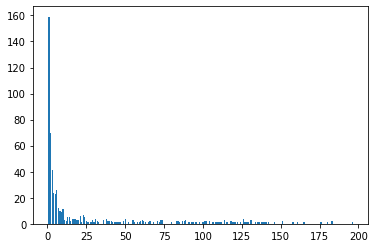

In [28]:
#pitanje 24
player_to_match_number = {}
for node in G.nodes:
    sum = 0.0
    for neighbor in nx.neighbors(G, node):
        sum+=G[node][neighbor]['weight']
    if sum in player_to_match_number.keys():
        player_to_match_number[sum]+=1
    else:
        player_to_match_number[sum]=1

print(player_to_match_number)
plt.bar(*zip(*player_to_match_number.items()))
plt.show()

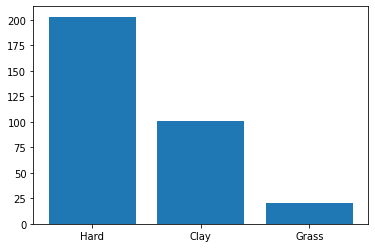

In [29]:
#pitanje 25
all_pairs_surface_tourney = set()
for _,row in atp_matches_data_ALL.iterrows():
   all_pairs_surface_tourney.add((row['surface'], row['tourney_id']))

tourneys_counter_by_surface = {}
for pair in all_pairs_surface_tourney:
    if pair[0] in tourneys_counter_by_surface.keys():
        tourneys_counter_by_surface[pair[0]] +=1
    else:
        tourneys_counter_by_surface[pair[0]]=1
plt.bar(*zip(*tourneys_counter_by_surface.items()))
plt.show()

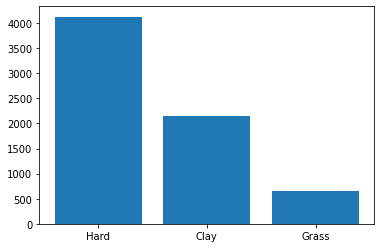

In [30]:
#pitanje 26
all_pairs_surface_matches = {}
for _,row in atp_matches_data_ALL.iterrows():
   if row['surface'] in all_pairs_surface_matches.keys():
        all_pairs_surface_matches[row['surface']] += 1
   else:
        all_pairs_surface_matches[row['surface']]=1

plt.bar(*zip(*all_pairs_surface_matches.items()))
plt.show()

In [31]:
#pitanje 13
bridges = list(nx.bridges(G))
player_bridges = {}
for edge in bridges:
    if edge[0] in player_bridges.keys():
        player_bridges[edge[0]] += 1
    else:
        player_bridges[edge[0]]=1
    if edge[1] in player_bridges.keys():
        player_bridges[edge[1]] += 1
    else:
        player_bridges[edge[1]]=1
print(dict(sorted(player_bridges.items(), key=lambda item: item[1], reverse=True)))

{'106233': 3, '133975': 3, '126174': 3, '111761': 3, '200250': 3, '105334': 3, '208055': 3, '106210': 2, '144817': 2, '100644': 2, '207738': 2, '106397': 2, '111167': 2, '105657': 2, '106021': 2, '138846': 2, '126939': 2, '200005': 2, '200574': 2, '105379': 2, '105467': 2, '105499': 2, '105575': 2, '125842': 2, '208518': 2, '105633': 2, '202358': 2, '144776': 2, '105812': 2, '200460': 2, '106324': 2, '105933': 2, '106198': 2, '103893': 2, '207852': 2, '202065': 2, '200553': 2, '106388': 2, '144932': 2, '200711': 1, '104547': 1, '110602': 1, '106138': 1, '104467': 1, '122533': 1, '104468': 1, '105515': 1, '104593': 1, '104597': 1, '133297': 1, '138431': 1, '104655': 1, '105961': 1, '105954': 1, '121896': 1, '207176': 1, '202165': 1, '104810': 1, '106227': 1, '104871': 1, '106031': 1, '104898': 1, '208103': 1, '104907': 1, '104947': 1, '104291': 1, '207400': 1, '207415': 1, '207421': 1, '126102': 1, '121411': 1, '105349': 1, '127570': 1, '206768': 1, '105062': 1, '122298': 1, '105077': 1

In [32]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza_nadal = nx.ego_graph(G, '104745')
ego_mreza_djokovic = nx.ego_graph(G, '104925')
ego_mreza_federer = nx.ego_graph(G, '103819')
output_path = "egoNadalALL.gml"
nx.write_gml(ego_mreza_nadal, output_path)
output_path = "egoDjokovicALL.gml"
nx.write_gml(ego_mreza_djokovic, output_path)
output_path = "egoFedererALL.gml"
nx.write_gml(ego_mreza_federer, output_path)
U=ego_mreza_djokovic
for node in ego_mreza_nadal.nodes:
    if not(node in U.nodes):
        U.add_node(node, name=ego_mreza_nadal.nodes[node]['name'],
               surname=ego_mreza_nadal.nodes[node]['surname'],
               country=ego_mreza_nadal.nodes[node]['country'],
               hand=ego_mreza_nadal.nodes[node]['hand'],
               dateOfBirth=ego_mreza_nadal.nodes[node]['dateOfBirth'],
               tourneyNum = ego_mreza_nadal.nodes[node]['tourneyNum'],
               avgRank=ego_mreza_nadal.nodes[node]['avgRank'],
               avgPoints=ego_mreza_nadal.nodes[node]['avgPoints'])

for node in ego_mreza_federer.nodes:
    if not(node in U.nodes):
        U.add_node(node, name=ego_mreza_federer.nodes[node]['name'],
               surname=ego_mreza_federer.nodes[node]['surname'],
               country=ego_mreza_federer.nodes[node]['country'],
               hand=ego_mreza_federer.nodes[node]['hand'],
               dateOfBirth=ego_mreza_federer.nodes[node]['dateOfBirth'],
               tourneyNum = ego_mreza_federer.nodes[node]['tourneyNum'],
               avgRank=ego_mreza_federer.nodes[node]['avgRank'],
               avgPoints=ego_mreza_federer.nodes[node]['avgPoints'])

for edge in ego_mreza_nadal.edges:
    if edge in U.edges:
        U[edge[0]][edge[1]]["weight"] += ego_mreza_nadal[edge[0]][edge[1]]["weight"]
        U[edge[0]][edge[1]]['lowerId']+=ego_mreza_nadal[edge[0]][edge[1]]['lowerId']
        U[edge[0]][edge[1]]['higherId']+=ego_mreza_nadal[edge[0]][edge[1]]['higherId']
    else:
        U.add_edge(*edge, weight=ego_mreza_nadal[edge[0]][edge[1]]["weight"],
                    lowerId=ego_mreza_nadal[edge[0]][edge[1]]['lowerId'],
                    higherId=ego_mreza_nadal[edge[0]][edge[1]]['higherId'])
for edge in ego_mreza_federer.edges:
    if edge in U.edges:
        U[edge[0]][edge[1]]["weight"] += ego_mreza_federer[edge[0]][edge[1]]["weight"]
        U[edge[0]][edge[1]]['lowerId']+=ego_mreza_federer[edge[0]][edge[1]]['lowerId']
        U[edge[0]][edge[1]]['higherId']+=ego_mreza_federer[edge[0]][edge[1]]['higherId']
    else:
        U.add_edge(*edge, weight=ego_mreza_federer[edge[0]][edge[1]]["weight"],
                    lowerId=ego_mreza_federer[edge[0]][edge[1]]['lowerId'],
                    higherId=ego_mreza_federer[edge[0]][edge[1]]['higherId'])

output_path = "egoOfBigThreeALL.gml"
nx.write_gml(U, output_path)

In [33]:
#pitanje 4
nodes_result=[]
sorted_by_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)
nodes_result.append(sorted_by_degree.pop(0)[0])
all_nodes_temp=set(G.neighbors(nodes_result[0]))
all_nodes_temp.add(nodes_result[0])
has_to_add = True
while(has_to_add):
    temp ={}
    for player in sorted_by_degree:
        if player[0] in nodes_result:
            continue
        temp[player[0]]=player[1]- len(list(all_nodes_temp.intersection(set(list(G.neighbors(player[0]))))))
    sorted_temp=list(sorted(temp.items(), key=lambda item: item[1], reverse=True))
    best=sorted_temp[0][0]
    nodes_result.append(best)
    all_nodes_temp.add(best)
    for item in list(G.neighbors(best)):
        all_nodes_temp.add(item)
    if(len(all_nodes_temp)/len(G.nodes)>0.5):
        has_to_add=False
for node in nodes_result:
    print(G.nodes[node])
print(len(nodes_result))
print(len(all_nodes_temp))

{'name': 'Karen', 'surname': 'Khachanov', 'country': 'RUS', 'hand': 'R', 'dateOfBirth': 19960521.0, 'tourneyNum': 70, 'avgRank': 20.100078802206465, 'avgPoints': 2130.987654320988, 'tourneyNum2018': 25, 'avgRank2018': 31.148936170212767, 'avgPoints2018': 1597.9787234042553, 'tourneyNum2019': 31, 'avgRank2019': 11.595744680851064, 'avgPoints2019': 2647.021276595745, 'tourneyNum2020': 14, 'avgRank2020': 17.555555555555557, 'avgPoints2020': 2147.962962962963}
{'name': 'Gilles', 'surname': 'Simon', 'country': 'FRA', 'hand': 'R', 'dateOfBirth': 19841227.0, 'tourneyNum': 67, 'avgRank': 48.657735749934325, 'avgPoints': 1067.819805621224, 'tourneyNum2018': 26, 'avgRank2018': 49.723404255319146, 'avgPoints2018': 1035.8510638297873, 'tourneyNum2019': 28, 'avgRank2019': 38.212765957446805, 'avgPoints2019': 1202.9787234042553, 'tourneyNum2020': 13, 'avgRank2020': 58.03703703703704, 'avgPoints2020': 964.6296296296297}
{'name': 'Pablo', 'surname': 'Cuevas', 'country': 'URU', 'hand': 'R', 'dateOfBirt

In [34]:
from collections import Counter
def plot_deg_frequency(G, weighted=False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)
    print(deg_counts)
    x, y = zip(*deg_counts.items())

    plt.figure(1)

    # prep axes
    if weighted:
        plt.xlabel('weighted degree')
    else:
        plt.xlabel('degree')
    plt.xscale(xscale)
    plt.xlim(1, max(x))

    plt.ylabel('frequency')
    plt.yscale(yscale)
    plt.ylim(1, max(y))

    plt.scatter(x, y, marker='.')
    plt.show()

In [35]:
n = G.number_of_nodes()
m = G.number_of_edges()

Counter({19: 59, 18: 54, 17: 53, 16: 50, 21: 47, 15: 45, 20: 41, 14: 33, 22: 31, 13: 28, 23: 22, 12: 21, 25: 17, 24: 13, 26: 11, 11: 11, 10: 11, 27: 9, 29: 6, 28: 5, 9: 4, 30: 3, 32: 3, 8: 2, 33: 1, 36: 1})
Counter({19: 59, 18: 54, 17: 53, 16: 50, 21: 47, 15: 45, 20: 41, 14: 33, 22: 31, 13: 28, 23: 22, 12: 21, 25: 17, 24: 13, 26: 11, 11: 11, 10: 11, 27: 9, 29: 6, 28: 5, 9: 4, 30: 3, 32: 3, 8: 2, 33: 1, 36: 1})


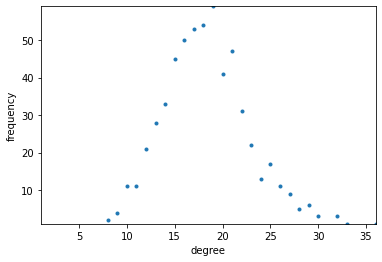

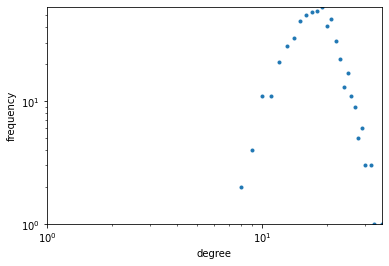

In [36]:
Gnm = nx.gnm_random_graph(n, m)

plot_deg_frequency(Gnm, xscale = 'linear', yscale = 'linear')
plot_deg_frequency(Gnm, xscale = 'log', yscale = 'log')

Kako bi se ponašala Erdos-Renyi mreža sa koja ima isti broj čvorova n, a verovatnoća formiranja grane je takva da je očekivani broj grana u mreži m?

0.03163392486200962
Broj čvorova originalne mreže minus broj čvorova u ER mreži iznosi 43, što je odstupanje od 0.8067542213883677%
Counter({16: 62, 19: 54, 18: 53, 17: 49, 20: 46, 15: 45, 22: 38, 13: 33, 21: 32, 14: 32, 24: 23, 23: 23, 12: 20, 11: 16, 25: 12, 26: 11, 10: 6, 27: 6, 29: 5, 28: 4, 8: 3, 31: 3, 33: 1, 32: 1, 30: 1, 9: 1, 6: 1})
Counter({16: 62, 19: 54, 18: 53, 17: 49, 20: 46, 15: 45, 22: 38, 13: 33, 21: 32, 14: 32, 24: 23, 23: 23, 12: 20, 11: 16, 25: 12, 26: 11, 10: 6, 27: 6, 29: 5, 28: 4, 8: 3, 31: 3, 33: 1, 32: 1, 30: 1, 9: 1, 6: 1})


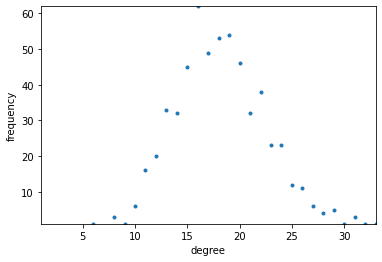

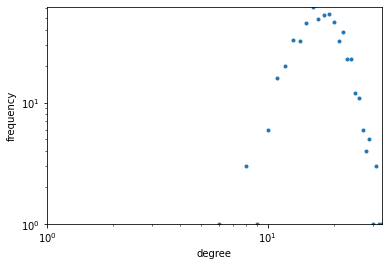

In [37]:
p = ( 2*float(m) ) / ( n* (n-1) )
print(p)

er_mreza = nx.erdos_renyi_graph(n,p)

delta_m = m - er_mreza.number_of_edges()
print(f"Broj čvorova originalne mreže minus broj čvorova u ER mreži iznosi {delta_m}, što je odstupanje od {abs(float(delta_m)) * 100 / m}%")

plot_deg_frequency(er_mreza, xscale = 'linear', yscale = 'linear')
plot_deg_frequency(er_mreza, xscale = 'log', yscale = 'log')

In [38]:
id_player, clustering_coef = zip(*nx.clustering(er_mreza, weight = "weight").items())

nonZero = [(id_ig, cc)  for id_ig, cc in zip(id_player, clustering_coef) if cc > 0]

df = pd.DataFrame(nonZero, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)
print(f"Max lokalni cc: {max(clustering_coef)}")
print(f"Prosečan cc: {nx.average_clustering(er_mreza)}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)

Max lokalni cc: 0.09090909090909091
Prosečan cc: 0.03312499942244096
Lokalni stepeni klasterisanja koji nisu nula:
      id        cc
512  529  0.005848
35    37  0.006536
229  237  0.006536
411  425  0.007353
254  262  0.007353
..   ...       ...
272  280  0.066667
542  559  0.072727
325  337  0.072727
443  457  0.075000
356  369  0.090909

[563 rows x 2 columns]


In [64]:
#pitanje 28
player_wins ={}
for node in G.nodes:
    player_wins[node]=0
    for temp in G[node]:
        if int(node)> int(temp):
            player_wins[node]+=G[node][temp]['higherId']
        else:
            player_wins[node]+=G[node][temp]['lowerId']
temp =dict(sorted(player_wins.items(), key=lambda item: item[1], reverse=True))
for elem in temp:
    print(G.nodes[elem])
    print(temp[elem]/G.degree(weight='weight')[elem])
    print(temp[elem])

{'name': 'Novak', 'surname': 'Djokovic', 'country': 'SRB', 'hand': 'R', 'dateOfBirth': 19870522.0, 'tourneyNum': 43, 'avgRank': 3.902285263987391, 'avgPoints': 8719.636196480169, 'tourneyNum2018': 16, 'avgRank2018': 9.404255319148936, 'avgPoints2018': 4464.68085106383, 'tourneyNum2019': 18, 'avgRank2019': 1.1914893617021276, 'avgPoints2019': 10754.04255319149, 'tourneyNum2020': 9, 'avgRank2020': 1.1111111111111112, 'avgPoints2020': 10940.185185185184}
0.8444444444444444
152
{'name': 'Rafael', 'surname': 'Nadal', 'country': 'ESP', 'hand': 'L', 'dateOfBirth': 19860603.0, 'tourneyNum': 35, 'avgRank': 1.6721828211189915, 'avgPoints': 9085.547675334908, 'tourneyNum2018': 10, 'avgRank2018': 1.3191489361702127, 'avgPoints2018': 8804.36170212766, 'tourneyNum2019': 18, 'avgRank2019': 1.8085106382978724, 'avgPoints2019': 8636.170212765957, 'tourneyNum2020': 7, 'avgRank2020': 1.8888888888888888, 'avgPoints2020': 9816.111111111111}
0.8675496688741722
131
{'name': 'Stefanos', 'surname': 'Tsitsipas'